In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [80]:
# загружаем данные из sklearn 
from sklearn.datasets import fetch_california_housing
raw_df = sklearn.datasets.fetch_california_housing(data_home=None, download_if_missing=True, return_X_y=False)
print(raw_df.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [81]:
df = pd.DataFrame(raw_df.data, columns=raw_df.feature_names)
df["Target"] = pd.DataFrame(raw_df.target, columns=raw_df.target_names)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


<h3>2.	Проведите первичный анализ.
<br>a.Проверьте данные на пропуски. Удалите в случае обнаружения.

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [83]:
# пропусков нет

<h3>b.*Нормализуйте один из признаков.

In [84]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [85]:
#Нормализуем признак Population, имеющий наибольший разброс между максимальным и минимальным значением
df['Population']=(df['Population']-df['Population'].min())/(df['Population'].max()-df['Population'].min())
df['Population'].describe()

count    20640.000000
mean         0.039869
std          0.031740
min          0.000000
25%          0.021974
50%          0.032596
75%          0.048264
max          1.000000
Name: Population, dtype: float64

<h3>3.Разделите выборку на обучающее и тестовое подмножества. 
     <br> 80% данных оставить на обучающее множество, 20% - на тестовое.

In [86]:
#X=df.drop(columns=['Target'])
#y=df['Target']
X, y = df.iloc[:,:-1], df.iloc[:,-1]

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

<h3>4.Обучите модель регрессии на обучающем множестве.

In [88]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

<h3>5.Для тестового множества предскажите целевую переменную и сравните с истинным значением, 
посчитав точность предсказания модели. Для этого используйте встроенную функцию score.

In [89]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score, mean_absolute_error, mean_squared_error, r2_score  
print('Метрики                  Значения')
print('MAE                      : %.3f'%mean_absolute_error(y_test, y_pred))
print('MSE                      : %.3f'%mean_squared_error(y_test, y_pred))
print('RMSE                     : %.3f'%np.sqrt(mean_squared_error(y_test, y_pred)))

print('r2_score                 : %.3f'%r2_score(y_test, y_pred))

Метрики                  Значения
MAE                      : 0.535
MSE                      : 0.524
RMSE                     : 0.724
r2_score                 : 0.615


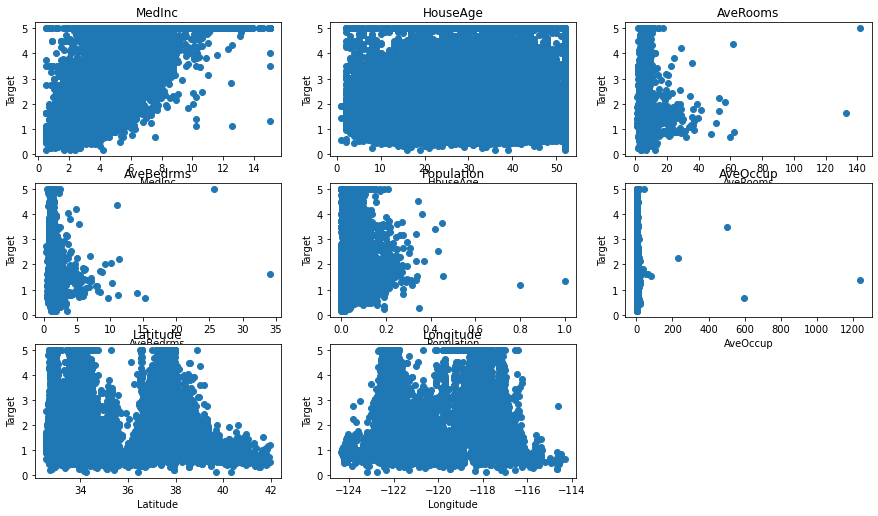

In [90]:
# посмотрим графики связи параметров с целевой переменной 
plt.figure(figsize=(15,35), facecolor='white')
plotnumber =1
for feature in X:
    ax = plt.subplot(12,3,plotnumber)
    plt.scatter(df[feature],df['Target'])
    plt.xlabel(feature)
    plt.ylabel('Target')
    plt.title(feature)
    plotnumber+=1
plt.show()

In [91]:
# видно, что нет четкой линейной связи с параметрами (кроме динамики по MedInc)

<h2>6.Обучите дерево решений на обучающем множестве.

In [92]:
X2=X; y2=y
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2)

In [93]:
from sklearn.tree import DecisionTreeRegressor
regr2 = DecisionTreeRegressor(random_state=0)
model2 = regr2.fit(X_train2, y_train2)
y_pred2 = model2.predict(X_test2)

In [94]:
model2.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

<h3>a. Повторите п. 5 для полученной модели.

Model				 RMSE 		 MSE 		 MAE 		 R2
Decision Tree Regressor 	 0.723 		 0.523 		0.459 		0.610


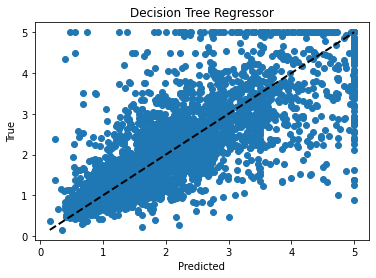

In [95]:
# построим график предсказаний целевой функции
print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Decision Tree Regressor \t {:.3f} \t\t {:.3f} \t\t{:.3f} \t\t{:.3f}""".format(
            np.sqrt(mean_squared_error(y_test2, y_pred2)),
            mean_squared_error(y_test2, y_pred2),
            mean_absolute_error(y_test2, y_pred2),
            r2_score(y_test2, y_pred2)))

plt.scatter(y_test2, y_pred2)
plt.plot([y_test2.min(), y_test2.max()], [y_test2.min(), y_test2.max()], 'k--', lw=2)

plt.xlabel("Predicted")
plt.ylabel("True")

plt.title("Decision Tree Regressor")

plt.show()

<h3> b. Визуализируйте часть дерева решений. Убедитесь, что график получился читабельным. Посмотрите примеры визуализации по ссылке.

In [96]:
# текстовое представление визуализации
from sklearn import tree
text_representation = tree.export_text(regr2)
print(text_representation)

|--- feature_0 <= 5.29
|   |--- feature_0 <= 3.11
|   |   |--- feature_2 <= 4.33
|   |   |   |--- feature_5 <= 2.49
|   |   |   |   |--- feature_6 <= 37.91
|   |   |   |   |   |--- feature_7 <= -118.24
|   |   |   |   |   |   |--- feature_7 <= -122.33
|   |   |   |   |   |   |   |--- feature_1 <= 25.00
|   |   |   |   |   |   |   |   |--- feature_2 <= 3.56
|   |   |   |   |   |   |   |   |   |--- feature_5 <= 1.98
|   |   |   |   |   |   |   |   |   |   |--- value: [1.40]
|   |   |   |   |   |   |   |   |   |--- feature_5 >  1.98
|   |   |   |   |   |   |   |   |   |   |--- value: [1.12]
|   |   |   |   |   |   |   |   |--- feature_2 >  3.56
|   |   |   |   |   |   |   |   |   |--- feature_7 <= -122.50
|   |   |   |   |   |   |   |   |   |   |--- value: [2.58]
|   |   |   |   |   |   |   |   |   |--- feature_7 >  -122.50
|   |   |   |   |   |   |   |   |   |   |--- value: [3.20]
|   |   |   |   |   |   |   |--- feature_1 >  25.00
|   |   |   |   |   |   |   |   |--- feature_2 <= 3.19
|

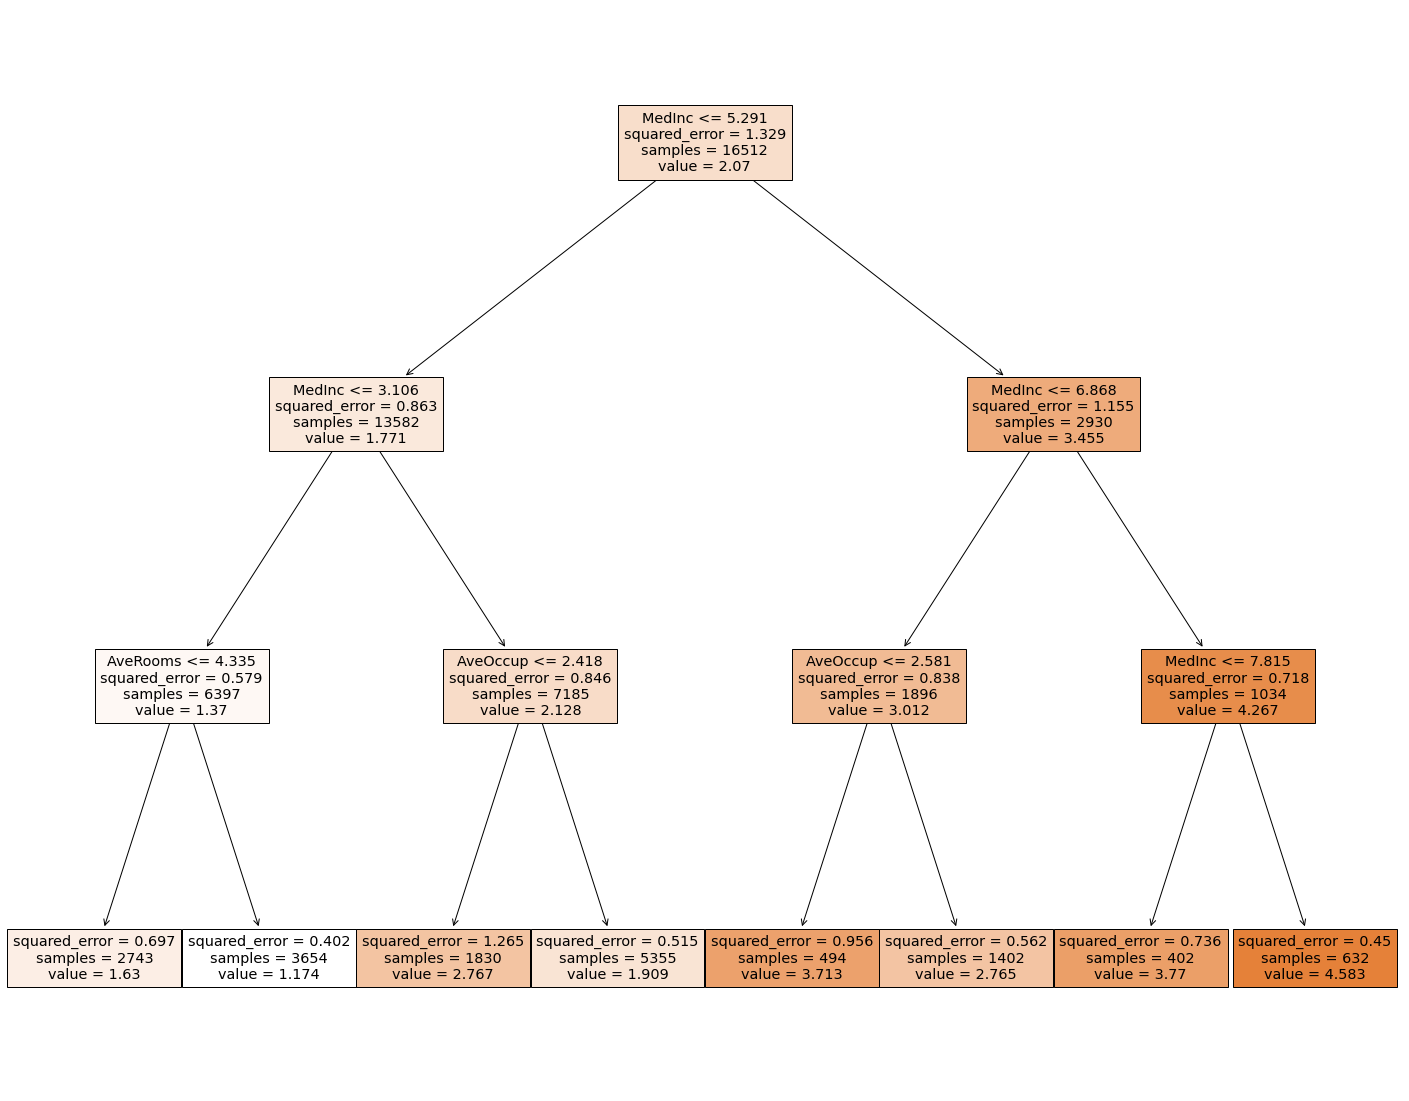

In [97]:
# Обучим дерево с глубиной = 3 и построим пример графика из библиотеки tree
regr2T = DecisionTreeRegressor(max_depth=3, random_state=0)
model2T = regr2T.fit(X_train2, y_train2)
y_pred2T = model2T.predict(X_test2)
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regr2T, feature_names=X2.columns, filled=True)

<h3>7.Оптимизируйте глубину дерева (max_depth). *Оптимизируйте ещё один параметр модели на выбор.

In [98]:
# Настроим гиперпараметры max_depth и min_sam_split
from sklearn.model_selection import GridSearchCV
max_d = list(range(1,20))
min_sam_split = list(range(10,50,15))
gridcv = GridSearchCV(regr2, param_grid={'max_depth':max_d, 'min_samples_split':min_sam_split}, n_jobs=-1)
gridcv.fit(X_train2, y_train2)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'min_samples_split': [10, 25, 40]})

In [99]:
# Оптимизируем 2 параметра: глубину дерева и количество образцов
print("Parameters :", gridcv.best_params_)
print("Train Score {:.3f} & Test Score {:.3f}".format(gridcv.score(X_train2, y_train2), gridcv.score(X_test2, y_test2)))

Parameters : {'max_depth': 12, 'min_samples_split': 40}
Train Score 0.839 & Test Score 0.708


<h3>a. Повторите п. 5 для полученной модели.

In [100]:
X3=X; y3=y
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size = 0.2)

In [101]:
# Посмотрим рeзультаты с оптимальными параметрами
regr3 = DecisionTreeRegressor(max_depth=14, min_samples_split = 40, random_state=0)
model3 = regr3.fit(X3, y3)
y_pred3 = model3.predict(X_test3)

In [102]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score, mean_absolute_error, mean_squared_error, r2_score  
print('Метрики                  Значения')
print('MAE                      : %.3f'%mean_absolute_error(y_test3, y_pred3))
print('MSE                      : %.3f'%mean_squared_error(y_test3, y_pred3))
print('RMSE                     : %.3f'%np.sqrt(mean_squared_error(y_test3, y_pred3)))

print('r2_score                 : %.3f'%r2_score(y_test3, y_pred3))

Метрики                  Значения
MAE                      : 0.311
MSE                      : 0.219
RMSE                     : 0.468
r2_score                 : 0.831


In [103]:
model3.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 14,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 40,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

<h3>8.Сформулируйте выводы по проделанной работе.

Оценка с помощью линейной регрессии показала результат r2 score = 0.620, что является недостаточным. Основная причина состояла в том, что не было четкой (линейной) связи целевой переменной с парметрами. Использование дерева решений без оптимизации не улучшило показатели модели. При этом оптимизация параметров позволила получить значительно лучшие результаты Score на тренировочной выборке составил - 0.853 и на тестовой - 0.709.

<h3>a. Сравните точность двух моделей.

In [104]:
# сравним метрики качества 3 моделей регрессии (линейной, дерева решений и оптимизированного дерева решений):
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score, mean_absolute_error, mean_squared_error, r2_score  
print('Метрики    LR / DTR / DTR(opt)')
print('MAE        : %.3f'%mean_absolute_error(y_test, y_pred), '/ %.3f'%mean_absolute_error(y_test2, y_pred2), '/ %.3f'%mean_absolute_error(y_test3, y_pred3))
print('MSE        : %.3f'%mean_squared_error(y_test, y_pred), '/ %.3f'%mean_squared_error(y_test2, y_pred2), '/ %.3f'%mean_squared_error(y_test3, y_pred3))
print('RMSE       : %.3f'%np.sqrt(mean_squared_error(y_test, y_pred)), '/ %.3f'%np.sqrt(mean_squared_error(y_test2, y_pred2)), '/ %.3f'%np.sqrt(mean_squared_error(y_test3, y_pred3)))
print()
print('r2_score   : %.3f'%r2_score(y_test, y_pred), '/ %.3f'%r2_score(y_test2, y_pred2), '/ %.3f'%r2_score(y_test3, y_pred3))

Метрики    LR / DTR / DTR(opt)
MAE        : 0.535 / 0.459 / 0.311
MSE        : 0.524 / 0.523 / 0.219
RMSE       : 0.724 / 0.723 / 0.468

r2_score   : 0.615 / 0.610 / 0.831


<h3>b. Напишите свое мнение, для каких задач предпочтительнее использовать обученные в работе модели? Какие у них есть плюсы и минусы?

Можно выделить следующие преимущества дерева решений по сравнению с линейной регрессией:
- Деревья поддерживают нелинейные решения.
- В общем случае деревья имеют лучшую среднюю точность.
- Лучшая обработка категориальных (и количественных) переменных.
- Лучшая обрабатка коллинеарности.
- Лучшая обработка выбросов и пропущенных значений.

Преимущества линейной регрессии:
- Линейная регрессия проста в реализации и легче интерпретировать выходные коэффициенты.
- Когда имеется большое количество объектов с меньшим количеством наборов данных (с низким уровнем шума), линейные      регрессии могут превзойти деревья решений / случайные леса.

Дальнейшие шаги по улучшения результатов включают изменение признаков (повышения их линейности), настройку прочих параметров дерева решений, использование анасамблей решающих деревьев и метода "случайного леса".